In [20]:
import ipdb
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pylab as pylab
import cartopy
import cartopy.crs as ccrs
from utils import constants as cnst
from eod import msg
from utils import u_grid, u_interpolate as u_int

pylab.rcParams['figure.figsize'] = (50., 50.)
%matplotlib inline

In [11]:
cd proj_CEH

/home/ck/pythonWorkspace/proj_CEH


In [12]:
msg_folder = cnst.network_data + 'data/OBS/meteosat_WA30'

yy=2006
m = msg.ReadMsg(msg_folder, y1=yy, y2=yy)
files  = m.fpath

mdic = m.read_data(files[0], llbox=[-18, 0, 9, 20])

In [13]:
mdic

<xarray.Dataset>
Dimensions:  (x: 607, y: 387)
Coordinates:
    lon      (y, x) float32 -16.989176 -16.95986 ... -0.05794301 -0.02897151
    time     datetime64[ns] 2006-06-01
    lat      (y, x) float32 9.011302 9.011049 9.010735 ... 19.971786 19.971796
Dimensions without coordinates: x, y
Data variables:
    t        (y, x) int32 17 19 21 21 22 21 21 22 ... -8 -10 -12 -13 -15 -15 -14

In [18]:
def draw_map(t, lat, lon):
    f=plt.figure(figsize=(15,10))
    ax = f.add_subplot(111, projection=ccrs.PlateCarree())
    plt.contourf(lon, lat, t, transform=ccrs.PlateCarree())
    ax.coastlines()
    # Gridlines
    xl = ax.gridlines(draw_labels=True);
    xl.xlabels_top = False
    xl.ylabels_right = False
    # Countries
    ax.add_feature(cartopy.feature.BORDERS, linestyle='--');
    plt.colorbar()
    plt.show()

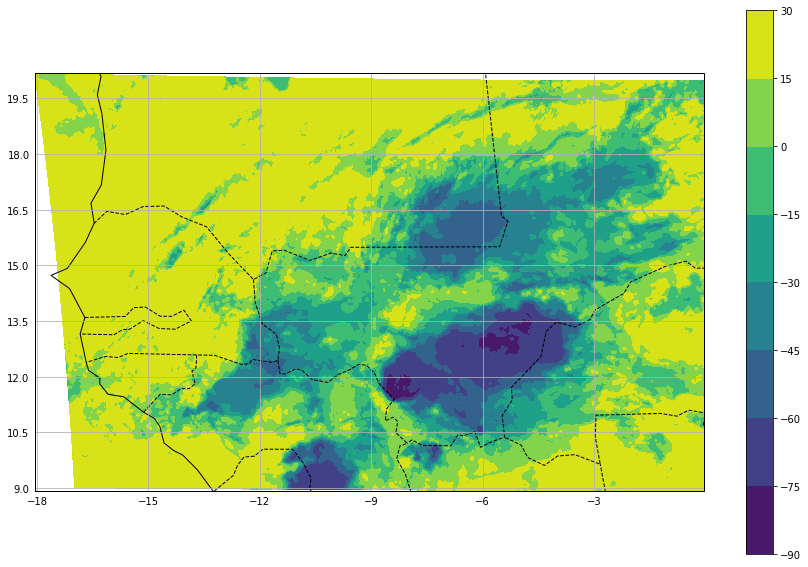

In [19]:
draw_map(mdic['t'], mdic['lat'], mdic['lon'])

In [21]:
# make salem grid
grid = u_grid.make(mdic['lon'].values, mdic['lat'].values, 5000)
inds, weights, shape = u_int.interpolation_weights_grid(mdic['lon'].values, mdic['lat'].values, grid)
gridd = (inds,weights,shape, grid)


In [22]:
outt = u_int.interpolate_data(mdic['t'].values, inds, weights, shape)

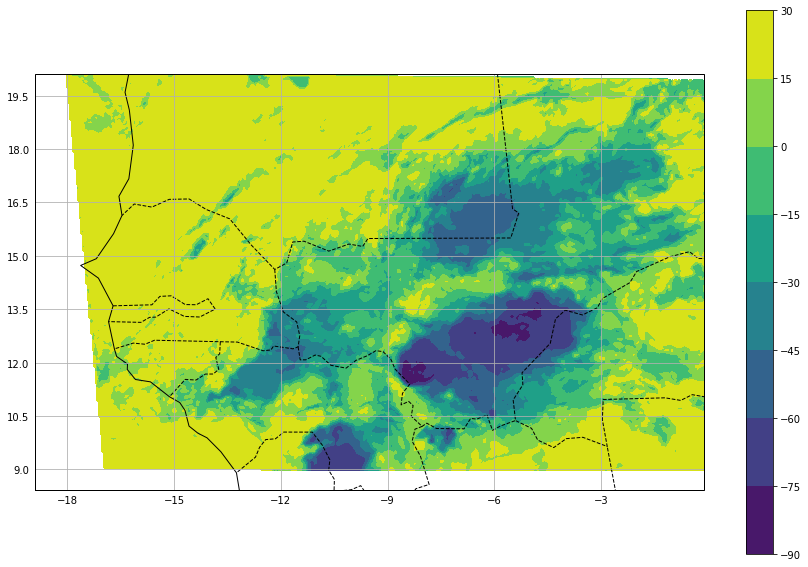

In [30]:
draw_map(outt, grid.ll_coordinates[1], grid.ll_coordinates[0])

In [27]:
grid.ll_coordinates

(array([[-18.06906891, -18.02415314, -17.97923738, ...,  -0.19259475,
          -0.14767899,  -0.10276323],
        [-18.06906891, -18.02415314, -17.97923738, ...,  -0.19259475,
          -0.14767899,  -0.10276323],
        [-18.06906891, -18.02415314, -17.97923738, ...,  -0.19259475,
          -0.14767899,  -0.10276323],
        ...,
        [-18.06906891, -18.02415314, -17.97923738, ...,  -0.19259475,
          -0.14767899,  -0.10276323],
        [-18.06906891, -18.02415314, -17.97923738, ...,  -0.19259475,
          -0.14767899,  -0.10276323],
        [-18.06906891, -18.02415314, -17.97923738, ...,  -0.19259475,
          -0.14767899,  -0.10276323]]),
 array([[ 8.93017387,  8.93017387,  8.93017387, ...,  8.93017387,
          8.93017387,  8.93017387],
        [ 8.97483424,  8.97483424,  8.97483424, ...,  8.97483424,
          8.97483424,  8.97483424],
        [ 9.01948904,  9.01948904,  9.01948904, ...,  9.01948904,
          9.01948904,  9.01948904],
        ...,
        [20.026321